#### Libraries 

In [161]:
import pandas as pd
import os
import numpy as np 
import sys
import nltk
import string
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from sklearn.feature_extraction.text import CountVectorizer
from nrclex import NRCLex

import nltk.corpus
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk import tokenize 
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.classify import SklearnClassifier


## Data preprocessing

In [53]:
joe = pd.read_csv('JoeBidenTweets.csv')
joe.head(3)
#joe.shape

,id,timestamp,url,tweet,replies,retweets,quotes,likes
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20


In [54]:
joe['date_simpl'] = joe['timestamp']

for el in joe['date_simpl']:
    el = el.split()[0]

joe.head()

,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl
0,361388562,2007-10-24 22:45,https://twitter.com/JoeBiden/status/361388562,Tune in 11:30 ET tomorrow for a live webcast o...,19,5,17,11,2007-10-24 22:45
1,543984392,2007-12-29 15:35,https://twitter.com/JoeBiden/status/543984392,"Iowans, there's a good chance there's a Biden ...",13,16,6,22,2007-12-29 15:35
2,189287227321356289,2012-04-09 09:42,https://twitter.com/JoeBiden/status/1892872273...,We're excited to announce that @JoeBiden is be...,21,82,1,20,2012-04-09 09:42
3,189287350034104320,2012-04-09 09:43,https://twitter.com/JoeBiden/status/1892873500...,Campaign staff will run this account to keep y...,144,76,37,51,2012-04-09 09:43
4,189339650610036736,2012-04-09 13:11,https://twitter.com/JoeBiden/status/1893396506...,News for you this morning: VP Biden will speak...,10,54,0,5,2012-04-09 13:11


In [55]:
df = joe[joe.date_simpl >= '2019-12-01'].reset_index()

In [56]:
df.head()

,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55


In [57]:
#code used to find out the most liked and retweeted tweets of Joe Biden
#the findings were added to the project proposal presentation and to the final paper 

#UNCOMMENT to see the results 
#most_liked_tweet = df[df.likes==max(df.likes)]
#most_retweet_tweet = df[df.retweets==max(df.retweets)]

In [58]:
#UNCOMMENT if needed

#nltk.download()

### Prepare the data with NLTK before any classification
Such as tokenization, stemming, ...

https://www.kaggle.com/kanikanarang94/tokenization-using-nltk 

#### Tokenization

In [59]:
df['tokenized'] = df['tweet'].apply(nltk.tokenize.WhitespaceTokenizer().tokenize)
df.head()


,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam..."
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai..."
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president..."
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak..."
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e..."


In [60]:
df['tokenized'][1]

['Over',
 'the',
 'last',
 '30',
 'years,',
 'the',
 'fight',
 'against',
 '#HIV',
 'has',
 'taught',
 'us',
 'to',
 'be',
 'big-hearted;',
 'to',
 'follow',
 'the',
 'science;',
 'to',
 'treat',
 'everyone',
 'with',
 'dignity',
 'and',
 'respect,',
 'and',
 'to',
 'protect',
 'the',
 'human',
 'rights',
 'of',
 'all',
 'who',
 'walk',
 'this',
 'planet.',
 '#WorldAIDSDay',
 'https://t.co/wOrUA8esbS']

#### Lower case

In [61]:
df['lower'] = df['tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized,lower
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam...","[eight, years, of, donald, trump, will, fundam..."
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai...","[over, the, last, 30, years,, the, fight, agai..."
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president...","[every, voter, counts., we, need, a, president..."
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak...","[congressman, and, former, admiral, @joesestak..."
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e...","[we’re, officially, on, the, road, for, our, e..."


#### Remove Stopwords

In [110]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['lower'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,text_string
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam...","[eight, years, of, donald, trump, will, fundam...","[eight, years, donald, trump, fundamentally, a...","[(eight, CD), (years, NNS), (donald, RB), (tru...","[(eight, n), (years, n), (donald, r), (trump, ...",NaN
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai...","[over, the, last, 30, years,, the, fight, agai...","[last, 30, years,, fight, #hiv, taught, us, bi...","[(last, JJ), (30, CD), (years,, JJ), (fight, N...","[(last, a), (30, n), (years,, a), (fight, n), ...",NaN
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president...","[every, voter, counts., we, need, a, president...","[every, voter, counts., need, president, ready...","[(every, DT), (voter, NN), (counts., VBP), (ne...","[(every, n), (voter, n), (counts., v), (need, ...",NaN
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak...","[congressman, and, former, admiral, @joesestak...","[congressman, former, admiral, @joesestak, ser...","[(congressman, NN), (former, JJ), (admiral, JJ...","[(congressman, n), (former, a), (admiral, a), ...",NaN
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e...","[we’re, officially, on, the, road, for, our, e...","[we’re, officially, road, eight-day, #nomalark...","[(we’re, NN), (officially, RB), (road, NN), (e...","[(we’re, n), (officially, r), (road, n), (eigh...",NaN


In [118]:
type(df['text_string'][0])

str

In [125]:
df['text_string'] = df['stopwords_removed'].apply(lambda x: ' '.join(x))

df['text_string'][0]

#df.head()

'eight years donald trump fundamentally alter character nation. cannot let happen. must make one-term president.'

##### Most frequent words


In [126]:
# most frequent words

count = Counter()

for text in df['text_string'].values:
    for word in text.split():
        count[word] = count[word] + 1


        
count.most_common(10)


[('—', 1045),
 ('trump', 667),
 ('donald', 617),
 ('president', 499),
 ('need', 405),
 ('get', 324),
 ('american', 316),
 ('make', 309),
 ('every', 285),
 ('one', 281)]

##### Removal of rare words

In [131]:
rare_word = 10

Rarewords = set([i for (i, ic) in count.most_common()[:-rare_word:-1]])

def del_rarewords(text):
    """
    function to remove the rare words
    """
    return " ".join([word for word in str(text).split() if word not in Rarewords])



df['text_string'] = df['text_string'].apply(lambda T: del_rarewords(T))


#### Token Normalization

   * Stemming: A process of removing and replacing suffixes to get to the root form of the word, which is called stem.
   * Lemmatization: returns the base or dictionary form of a word.



#### Lemmatization
turn the words to base form 

In [133]:
lemmatizer = WordNetLemmatizer()
wordnet_m = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}


def lemmat_pos_word(text):
    
    pos_tagger_text = nltk.pos_tag(text.split())
    
    return " ".join([lemmatizer.lemmatize(word, wordnet_m.get(pos[0],wordnet.NOUN)) for word,pos in pos_tagger_text])



df['lemma_text'] = df['text_string'].apply(lambda T : lemmat_pos_word(T))

df.head()


,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,text_string,lemma_text
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam...","[eight, years, of, donald, trump, will, fundam...","[eight, years, donald, trump, fundamentally, a...","[(eight, CD), (years, NNS), (donald, RB), (tru...","[(eight, n), (years, n), (donald, r), (trump, ...",eight years donald trump fundamentally alter c...,eight year donald trump fundamentally alter ch...
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai...","[over, the, last, 30, years,, the, fight, agai...","[last, 30, years,, fight, #hiv, taught, us, bi...","[(last, JJ), (30, CD), (years,, JJ), (fight, N...","[(last, a), (30, n), (years,, a), (fight, n), ...","last 30 years, fight #hiv taught us big-hearte...","last 30 years, fight #hiv teach u big-hearted;..."
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president...","[every, voter, counts., we, need, a, president...","[every, voter, counts., need, president, ready...","[(every, DT), (voter, NN), (counts., VBP), (ne...","[(every, n), (voter, n), (counts., v), (need, ...",every voter counts. need president ready liste...,every voter counts. need president ready liste...
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak...","[congressman, and, former, admiral, @joesestak...","[congressman, former, admiral, @joesestak, ser...","[(congressman, NN), (former, JJ), (admiral, JJ...","[(congressman, n), (former, a), (admiral, a), ...",congressman former admiral @joesestak served c...,congressman former admiral @joesestak serve co...
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e...","[we’re, officially, on, the, road, for, our, e...","[we’re, officially, road, eight-day, #nomalark...","[(we’re, NN), (officially, RB), (road, NN), (e...","[(we’re, n), (officially, r), (road, n), (eigh...",we’re officially road eight-day #nomalarkey to...,we’re officially road eight-day #nomalarkey to...


##### First,
Determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

In [64]:
df['pos_tags'] = df['stopwords_removed'].apply(nltk.tag.pos_tag)
df.head()

,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized,lower,stopwords_removed,pos_tags
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam...","[eight, years, of, donald, trump, will, fundam...","[eight, years, donald, trump, fundamentally, a...","[(eight, CD), (years, NNS), (donald, RB), (tru..."
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai...","[over, the, last, 30, years,, the, fight, agai...","[last, 30, years,, fight, #hiv, taught, us, bi...","[(last, JJ), (30, CD), (years,, JJ), (fight, N..."
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president...","[every, voter, counts., we, need, a, president...","[every, voter, counts., need, president, ready...","[(every, DT), (voter, NN), (counts., VBP), (ne..."
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak...","[congressman, and, former, admiral, @joesestak...","[congressman, former, admiral, @joesestak, ser...","[(congressman, NN), (former, JJ), (admiral, JJ..."
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e...","[we’re, officially, on, the, road, for, our, e...","[we’re, officially, road, eight-day, #nomalark...","[(we’re, NN), (officially, RB), (road, NN), (e..."


**NLTK’s word lemmatizer** needs the parts of speech tags to be converted to wordnet’s format. 

Write a function which make the proper conversion and then use the function within a list comprehension to apply the conversion. 
Finally, apply NLTK’s word lemmatizer.

In [65]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
df['wordnet_pos'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df.head() 


,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,"[Eight, years, of, Donald, Trump, will, fundam...","[eight, years, of, donald, trump, will, fundam...","[eight, years, donald, trump, fundamentally, a...","[(eight, CD), (years, NNS), (donald, RB), (tru...","[(eight, n), (years, n), (donald, r), (trump, ..."
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,"[Over, the, last, 30, years,, the, fight, agai...","[over, the, last, 30, years,, the, fight, agai...","[last, 30, years,, fight, #hiv, taught, us, bi...","[(last, JJ), (30, CD), (years,, JJ), (fight, N...","[(last, a), (30, n), (years,, a), (fight, n), ..."
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,"[Every, voter, counts., We, need, a, president...","[every, voter, counts., we, need, a, president...","[every, voter, counts., need, president, ready...","[(every, DT), (voter, NN), (counts., VBP), (ne...","[(every, n), (voter, n), (counts., v), (need, ..."
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,"[Congressman, and, former, Admiral, @JoeSestak...","[congressman, and, former, admiral, @joesestak...","[congressman, former, admiral, @joesestak, ser...","[(congressman, NN), (former, JJ), (admiral, JJ...","[(congressman, n), (former, a), (admiral, a), ..."
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,"[We’re, officially, on, the, road, for, our, e...","[we’re, officially, on, the, road, for, our, e...","[we’re, officially, road, eight-day, #nomalark...","[(we’re, NN), (officially, RB), (road, NN), (e...","[(we’re, n), (officially, r), (road, n), (eigh..."


##### Stemming

In [45]:
words  = nltk.tokenize.WhitespaceTokenizer().tokenize(df["tweet"][0])
prova = pd.DataFrame()
prova['OriginalWords'] = pd.Series(words)
#porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
prova['PorterStemmedWords'] = pd.Series(porterStemmedWords)
#SnowBall stemmer
snowballStemmedWords = [nltk.stem.SnowballStemmer("english").stem(word) for word in words]
prova['SnowballStemmedWords'] = pd.Series(snowballStemmedWords)
prova

,OriginalWords,PorterStemmedWords,SnowballStemmedWords
0,Eight,eight,eight
1,years,year,year
2,of,of,of
3,Donald,donald,donald
4,Trump,trump,trump
5,will,will,will
6,fundamentally,fundament,fundament
7,alter,alter,alter
8,the,the,the
9,character,charact,charact


## Sentiment Analysis

In [70]:
! ls

01-Computational Social Science and the Study of Political Communication.pdf
02-inference_personalattr.pdf
03-Uyheng-Carley2020_Article_BotsAndOnlineHateDuringTheCOVI.pdf
04-clinton_trump_2016.pdf
CMHB presentation.pptx
Final Paper.docx
JoeBidenTweets.csv
NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt
Project.ipynb
ppt
prova.R
provapy.ipynb
str.pages


### NRClex

In [72]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)

,word,emotion,association
0,abandonment,negative,1
1,abandonment,positive,0
2,abandonment,sadness,1
3,abandonment,surprise,1
4,abandonment,trust,0
5,abate,anger,0
6,abate,anticipation,0
7,abate,disgust,0
8,abate,fear,0
9,abate,joy,0


In [78]:
# what emotions are covered and count values for each 
emolex_df.emotion.unique()
emolex_df.emotion.value_counts()

negative        14178
trust           14178
sadness         14178
surprise        14178
positive        14178
anticipation    14177
joy             14177
anger           14177
disgust         14177
fear            14177
Name: emotion, dtype: int64

In [79]:
# how many words each emotions has
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3322
positive        2312
fear            1473
anger           1245
trust           1230
sadness         1189
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [135]:
sid = SentimentIntensityAnalyzer()

In [138]:
df['scores'] = df['lemma_text'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df['Negative']  = df['scores'].apply(lambda score_dict: score_dict['neg'])

df['Neutral']  = df['scores'].apply(lambda score_dict: score_dict['neu'])

df['Positive']  = df['scores'].apply(lambda score_dict: score_dict['pos'])




df['number_of_words'] = df['text_string'].str.split().apply(lambda x: len(x))


df.head()

,index,id,timestamp,url,tweet,replies,retweets,quotes,likes,date_simpl,...,pos_tags,wordnet_pos,text_string,lemma_text,scores,compound,Negative,Neutral,Positive,number_of_words
0,2938,1200932522177122304,2019-12-01 00:20,https://twitter.com/JoeBiden/status/1200932522...,Eight years of Donald Trump will fundamentally...,4408,7287,787,53159,2019-12-01 00:20,...,"[(eight, CD), (years, NNS), (donald, RB), (tru...","[(eight, n), (years, n), (donald, r), (trump, ...",eight years donald trump fundamentally alter c...,eight year donald trump fundamentally alter ch...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000,15
1,2939,1201226459278385154,2019-12-01 19:48,https://twitter.com/JoeBiden/status/1201226459...,"Over the last 30 years, the fight against #HIV...",176,512,27,2148,2019-12-01 19:48,...,"[(last, JJ), (30, CD), (years,, JJ), (fight, N...","[(last, a), (30, n), (years,, a), (fight, n), ...","last 30 years, fight #hiv taught us big-hearte...","last 30 years, fight #hiv teach u big-hearted;...","{'neg': 0.091, 'neu': 0.523, 'pos': 0.387, 'co...",0.8176,0.091,0.523,0.387,21
2,2940,1201255903498002432,2019-12-01 21:45,https://twitter.com/JoeBiden/status/1201255903...,Every voter counts. We need a president who is...,1099,1400,140,10120,2019-12-01 21:45,...,"[(every, DT), (voter, NN), (counts., VBP), (ne...","[(every, n), (voter, n), (counts., v), (need, ...",every voter counts. need president ready liste...,every voter counts. need president ready liste...,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp...",0.3612,0.000,0.783,0.217,10
3,2941,1201296419987972096,2019-12-02 00:26,https://twitter.com/JoeBiden/status/1201296419...,Congressman and former Admiral @JoeSestak has ...,111,250,11,1654,2019-12-02 00:26,...,"[(congressman, NN), (former, JJ), (admiral, JJ...","[(congressman, n), (former, a), (admiral, a), ...",congressman former admiral @joesestak served c...,congressman former admiral @joesestak serve co...,"{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'comp...",0.9246,0.000,0.474,0.526,18
4,2942,1201303718391615493,2019-12-02 00:55,https://twitter.com/JoeBiden/status/1201303718...,We’re officially on the road for our eight-day...,1171,546,216,3232,2019-12-02 00:55,...,"[(we’re, NN), (officially, RB), (road, NN), (e...","[(we’re, n), (officially, r), (road, n), (eigh...",we’re officially road eight-day #nomalarkey to...,we’re officially road eight-day #nomalarkey to...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000,9


#### N-gram analysis function

In [139]:
def text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



## Some Data Visualisation

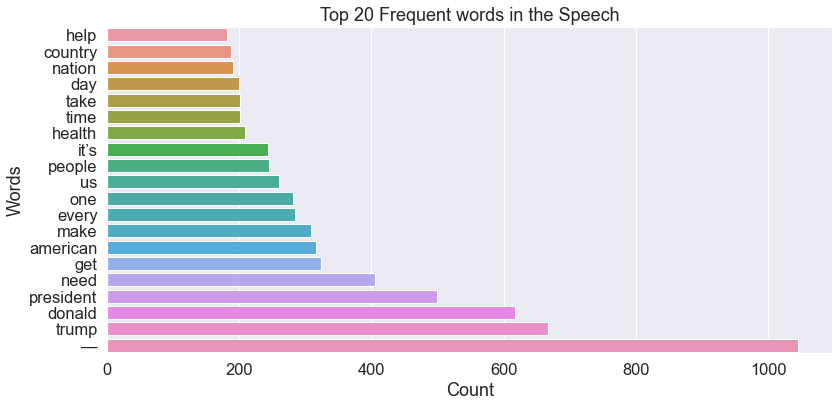

In [142]:


freq_word = count.most_common(20)

freq_word_plot1 = pd.Series( (v[0] for v in freq_word) )
freq_word_plot2 = pd.Series( (v[1] for v in freq_word) )


data_freq = pd.DataFrame({'Words':freq_word_plot1,'Count':freq_word_plot2})
data_freq = data_freq.sort_values('Count')


#plot
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(data=data_freq,y='Words',x='Count');
plt.title('Top 20 Frequent words in the Speech');
plt.tight_layout();



_Wordcloud_

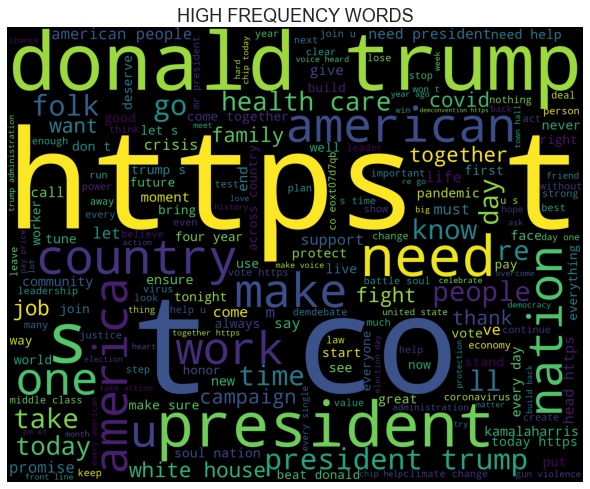

In [158]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['lemma_text']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wc = WordCloud(width = 1900, height = 1500, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

#wordcloud.recolor(color_func = grey_color_func)

default_colors = wc.to_array()
#plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
  

 #plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#FFFFFF') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('HIGH FREQUENCY WORDS')  
plt.show() 

#### Unigram 

Text(0.5, 1.0, 'Unigram Analysis')

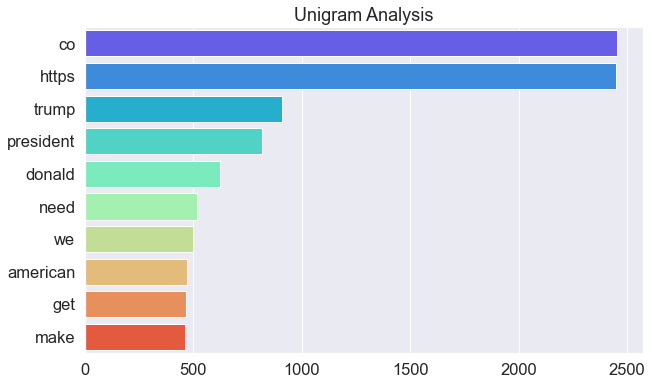

In [162]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df.lemma_text,10,1)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow')
plt.title('Unigram Analysis')


#### Bigram

Text(0.5, 1.0, 'bigram Analysis')

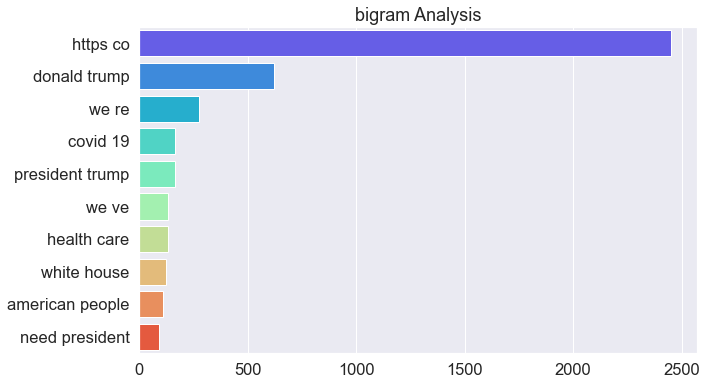

In [166]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df.lemma_text,10,2)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow')
plt.title('bigram Analysis')

#### Trigram

Text(0.5, 1.0, 'Trigram Analysis')

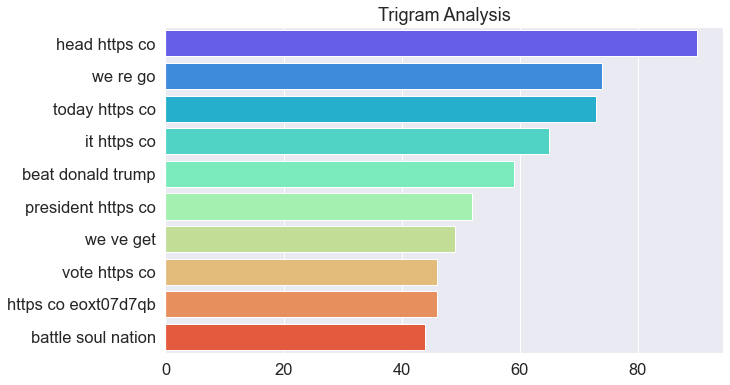

In [164]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
Unigram_word = text_ngrams(df.lemma_text,10,3)
Unigram_word = dict(Unigram_word)
sns.barplot(x=list(Unigram_word.values()),y=list(Unigram_word.keys()),palette = 'rainbow')
plt.title('Trigram Analysis')

## Sentiment Analysis

In [167]:
# data for plot
df_sen = df[['Negative','Neutral', 'Positive']]
df_sen_avg = df_sen.mean().reset_index()
df_sen_avg.columns = ['sentiments','score']



##### Plot 

Text(0.5, 1.0, 'Sentiments in Tweets')

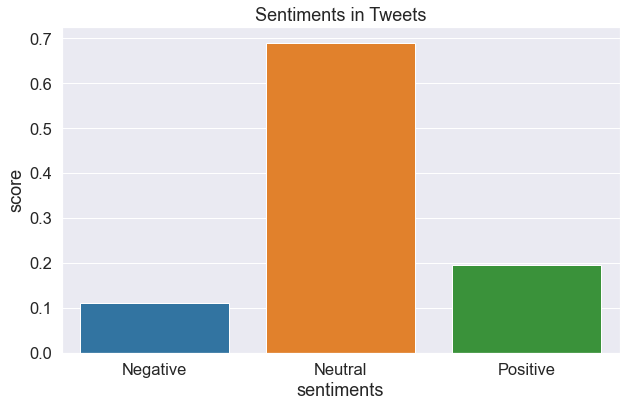

In [168]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(y='score', x='sentiments', data=df_sen_avg)
plt.title('Sentiments in Tweets')

### NRClex

Sentiment dictionary that measures emotional affects (fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, joy)

In [170]:
def Review_emo(word):
    """
    Function to convert the raw data to utf-8 formate
    
    * convert to data Frame
    
    """
    
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    
    return str_text


rating_clean = Review_emo(df['lemma_text'])


##### Plot

Text(0.5, 1.0, "Emotional affects in Biden's Tweets")

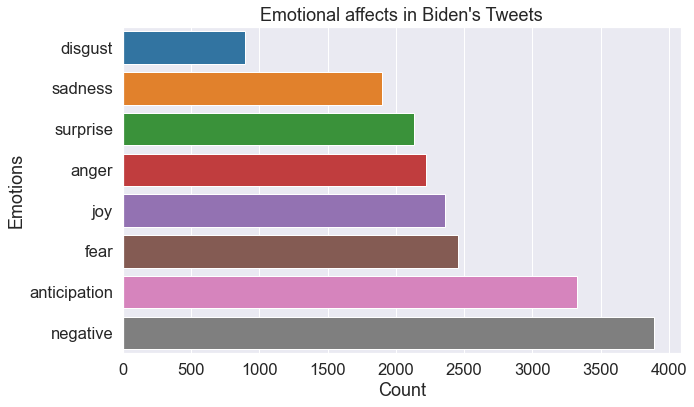

In [176]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(y='Emotions',x='Count',data=rating_clean[0:8],)
plt.title("Emotional affects in Biden's Tweets")